# 

# Employee Attrition 



###  Problem statement: 
Employee attrition refers to the percentage of workers who leave an organization and are replaced by new employees. A high rate of attrition in an organization leads to increased recruitment, hiring and training costs. Not only it is costly, but qualified and competent replacements are hard to find.  The Attrition Prediction model estimates the attrition risk for your employee populations in real-time. The purpose of this case is to uncover the factors that lead to employee attrition and explore important drivers of employee attrition.




### Required Libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib
from sklearn.model_selection import train_test_split
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,precision_recall_curve,plot_precision_recall_curve,f1_score,accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


font = {#'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)

### Uploading Dataset 

In [2]:
data = pd.read_csv('attrition.csv')
data.drop('Unnamed: 0',axis=1, inplace=True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life_Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research_Development,8,Below_College,Life_Sciences,High,Male,...,Outstanding,Very_High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research_Development,2,College,Other,Very_High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research_Development,3,Master,Life_Sciences,Very_High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research_Development,2,Below_College,Medical,Low,Male,...,Excellent,Very_High,1,6,3,Better,2,2,2,2


In [3]:
data['StockOptionLevel'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

###  Function to evaluate performance of Classification model

In [4]:
def evaluate(model, Y_test, X_test,X_train,Y_train): 
    
    # predict the target on the train dataset
    predict_train = model.predict(X_train)

    # Accuray Score on train dataset
    accuracy_train = accuracy_score(Y_train,predict_train)
    print('Accuracy Score on train dataset : ', round(accuracy_train,2))

    # predict the target on the test dataset
    predict_test = model.predict(X_test)

    # Accuracy Score on test dataset
    accuracy_test = accuracy_score(Y_test,predict_test)
    print('Accuracy_score on test dataset : ', round(accuracy_test,2), '\n')
    
    precision = precision_score(Y_test,  predict_test)
    recall = recall_score(Y_test,  predict_test)
    accuracy= accuracy_score(Y_test,  predict_test)
    F1_score= f1_score(Y_test,  predict_test)

    print('Model Performance')
    print('Precision: {}'.format(round(precision,2)))
    print('Recall: {}'.format(round(recall,2)))
    print('Accuracy:{}'.format(round(accuracy,2)))
    print('F1-score: : {}'.format(round(F1_score,2)),'\n')

### Hint: use below mentioned method to call classification 

In [5]:
tree = DecisionTreeClassifier() # insteaed of DecisionTreeRegressor()
forest = RandomForestClassifier() # instead of RandomForestRegressor()
gbm = GradientBoostingClassifier() # instead of GradientBoostingRegressor()
xgbc = XGBClassifier()             #Instead of XGBRegresor()

# Questions

### 1.  Apply Proper Data Pre-Processign and EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [7]:
data_transformed = data.copy(deep = True)
#data_transformed = pd.get_dummies(data_transformed, columns=data_transformed.columns[data_transformed.dtypes=='object'], drop_first=True)
data_transformed = pd.get_dummies(data_transformed, columns=['Attrition'], drop_first=True)


In [8]:
data_transformed

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes
0,41,Travel_Rarely,1102,Sales,1,College,Life_Sciences,Medium,Female,94,...,Low,0,8,0,Bad,6,4,0,5,1
1,49,Travel_Frequently,279,Research_Development,8,Below_College,Life_Sciences,High,Male,61,...,Very_High,1,10,3,Better,10,7,1,7,0
2,37,Travel_Rarely,1373,Research_Development,2,College,Other,Very_High,Male,92,...,Medium,0,7,3,Better,0,0,0,0,1
3,33,Travel_Frequently,1392,Research_Development,3,Master,Life_Sciences,Very_High,Female,56,...,High,0,8,3,Better,8,7,3,0,0
4,27,Travel_Rarely,591,Research_Development,2,Below_College,Medical,Low,Male,40,...,Very_High,1,6,3,Better,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research_Development,23,College,Medical,High,Male,41,...,High,1,17,3,Better,5,2,0,3,0
1466,39,Travel_Rarely,613,Research_Development,6,Below_College,Medical,Very_High,Male,42,...,Low,1,9,5,Better,7,7,1,7,0
1467,27,Travel_Rarely,155,Research_Development,4,Bachelor,Life_Sciences,Medium,Male,87,...,Medium,1,6,0,Better,6,2,0,3,0
1468,49,Travel_Frequently,1023,Sales,2,Bachelor,Medical,Very_High,Male,63,...,Very_High,0,17,3,Good,9,6,0,8,0


In [25]:
data_transformed = pd.get_dummies(data_transformed, columns=data_transformed.columns[data_transformed.dtypes=='object'], drop_first= True)

### 2. Split dataset to Trains and Test set (dont forget to set the seed)

In [26]:
#X = data_transformed.loc[:,data_transformed.columns!='Attrition_Yes'.values
#Y = data_transformed.loc[:,'Attrition_Yes'.values]

X = data_transformed.loc[:,data_transformed.columns!='Attrition_Yes'].values
Y = data_transformed.loc[:, 'Attrition_Yes'].values
                         
#Split the data into training and testing 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

### 3. Fit Tree Classifier to the Train set (tune paramters) and evaluate performance using evalute() function

In [27]:
tree.fit(X_train,Y_train)

evaluate(tree, Y_test, X_test,X_train,Y_train)


Accuracy Score on train dataset :  1.0
Accuracy_score on test dataset :  0.82 

Model Performance
Precision: 0.43
Recall: 0.4
Accuracy:0.82
F1-score: : 0.41 



In [28]:
param_grid = {
    'max_depth': [20, 50, 80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5,10],
    'min_samples_split': [8, 10, 12 , 17],
    'random_state' : [2]
}

# Instantiate the grid search model
tree_cv = GridSearchCV(estimator = tree, param_grid = param_grid, scoring = 'r2', cv = 10, n_jobs = -1, verbose = 2)
tree_cv.fit(X_train, Y_train)
evaluate(tree_cv, Y_test, X_test,X_train,Y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Accuracy Score on train dataset :  0.9
Accuracy_score on test dataset :  0.85 

Model Performance
Precision: 0.56
Recall: 0.31
Accuracy:0.85
F1-score: : 0.4 



### 4. Fit Random Forest to the Train set (tune parameters) and evaluate performance using evalute() function

In [29]:
forest.fit(X_train, Y_train)

evaluate(forest, Y_test, X_test,X_train,Y_train)

Accuracy Score on train dataset :  1.0
Accuracy_score on test dataset :  0.87 

Model Performance
Precision: 0.86
Recall: 0.25
Accuracy:0.87
F1-score: : 0.39 



In [30]:
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3,5, 10],
    'min_samples_split': [8, 10, 12],
    'random_state' : [2]
}
forest_cv = GridSearchCV(estimator = forest, param_grid = param_grid,  scoring = 'r2', cv = 10, n_jobs = -1, verbose = 2)
forest_cv.fit(X_train, Y_train)
evaluate(forest_cv, Y_test, X_test,X_train,Y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Accuracy Score on train dataset :  0.93
Accuracy_score on test dataset :  0.87 

Model Performance
Precision: 0.85
Recall: 0.23
Accuracy:0.87
F1-score: : 0.36 



### 5. Fit GBM  model to the Train Set and evaluate performance using evalute() function

In [31]:
gbm.fit(X_train, Y_train)
evaluate(gbm, Y_test, X_test,X_train,Y_train)


Accuracy Score on train dataset :  0.96
Accuracy_score on test dataset :  0.86 

Model Performance
Precision: 0.67
Recall: 0.29
Accuracy:0.86
F1-score: : 0.41 



In [32]:
param_grid = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
     'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
     'random_state' : [2]
    }
gbm_cv = GridSearchCV(estimator = gbm, param_grid = param_grid, scoring = 'r2',cv = 2, n_jobs = -1, verbose = 2)
gbm_cv.fit(X_train, Y_train)
evaluate(gbm_cv, Y_test, X_test,X_train,Y_train)

Fitting 2 folds for each of 70 candidates, totalling 140 fits
Accuracy Score on train dataset :  0.99
Accuracy_score on test dataset :  0.86 

Model Performance
Precision: 0.68
Recall: 0.31
Accuracy:0.86
F1-score: : 0.43 



### 6. Fit XGBoost  model to the Train Set and evaluate performance using evalute() function

In [33]:
xgbc.fit(X_train, Y_train)
evaluate(xgbc, Y_test, X_test,X_train,Y_train)

Accuracy Score on train dataset :  1.0
Accuracy_score on test dataset :  0.84 

Model Performance
Precision: 0.54
Recall: 0.27
Accuracy:0.84
F1-score: : 0.36 



In [34]:
param_grid = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
     'max_depth': [1,2,3,4,5,10],
     'random_state' : [2]
    }

xgbc_cv = GridSearchCV(estimator = xgbc, param_grid = param_grid, scoring = 'r2',cv = 2, n_jobs = -1, verbose = 2)
xgbc_cv.fit(X_train, Y_train)
evaluate(xgbc_cv, Y_test, X_test,X_train,Y_train)

Fitting 2 folds for each of 42 candidates, totalling 84 fits
Accuracy Score on train dataset :  0.94
Accuracy_score on test dataset :  0.87 

Model Performance
Precision: 0.75
Recall: 0.31
Accuracy:0.87
F1-score: : 0.44 



### 7. Compare the performance of four deveoped models

### For the tree based model after tuning our parameters our Accuracy Score on our test dataset 85%. Our model's Recall is 31% meaning that out of all the real positive values (left work) our model correctly predicted 31% of them as leaving work. Our precision is 56% meaning that out of all the predicted positives from our model only 56% were correctly predicted. Our F-1 Score is 40% 

### For the tuned Random Forest Model our accuracy on our test dateset is 87% this is slightly better than our tree model meaning overall this method is better at predicting a positive or a negative(did not leave work). Our Recall is 23% meaning that out of all the real positive values (left work) our model correctly predicted only 23% of them as leaving work. This may mean that our model is not heavily focused on predicting positives. Our precision is 85% meaning that out of all the predicted positives from our model 85 % were correctly predicted. Our F-1 Score is 36% lower than our previous model which means on average this model is worse than our tree based model. 

### For our tuned Gradient Boosting Model (GBM) our accuracy on our test dataset is 86% this is in between our previous two models.  Our Recall is 31% meaning that out of all the real positive values (left work) our model correctly predicted 31% of them as leaving work. This is the same as our tree based model and higher than the Random Forest model. Our precision is 68%% meaning that out of all the predicted positives from our model 68% were correctly predicted. This is slightly lower than our Random Forest Model and may mean that the GBM model relies too heavily on predicting positives. Our F1-score is 43% making this better than Random Forest and the Tree based model. 

### For our Extreme Gradient Boosting model (XGBoost) our accuracy on our test dataset is 87% the same as our Random Forest model and higher than the tree based model and GBM model. This model has a Recall of 31% meaning that out of all the real positive values (left work) our model correctly predicted 31% of them as leaving work. This is the same result as our tree and GBM model and higher than our Random Forest Model. The precision is 75% meaning that out of all the predicted positives from our model 75 % were correctly predicted. This is higher than our tree based, and GBM model but lower than the Random Forest Model. This model gives us an F1-score of 44% making it the best overall model when accounting for both precision and recall. 

Accuracy Score on train dataset :  0.94
Accuracy_score on test dataset :  0.87 

Model Performance
Precision: 0.75
Recall: 0.31
Accuracy:0.87
F1-score: : 0.44


### 8. Is the data imbalance? Is it causing problem in your model(s)? which of them ? why?

In [35]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

### There is an imbalance in the predicted variable because a majority of the data consists of observations that did not leave their company or Attrition = No. Above we can see from our original dataset 1233 people did not leave their work and only 237 people left their work. This can cause our model to predict that an employee will not leave the company simply because most employees do not leave their companies. All our models suffer an imbalance issure.   

### 9. Derive important features using the best performed model

In [36]:
#XGboost model with parameter tuning is the best model
k=data_transformed.drop('Attrition_Yes', axis=1).columns
feature_imp = pd.Series(xgbc.feature_importances_,index=k).sort_values(ascending=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


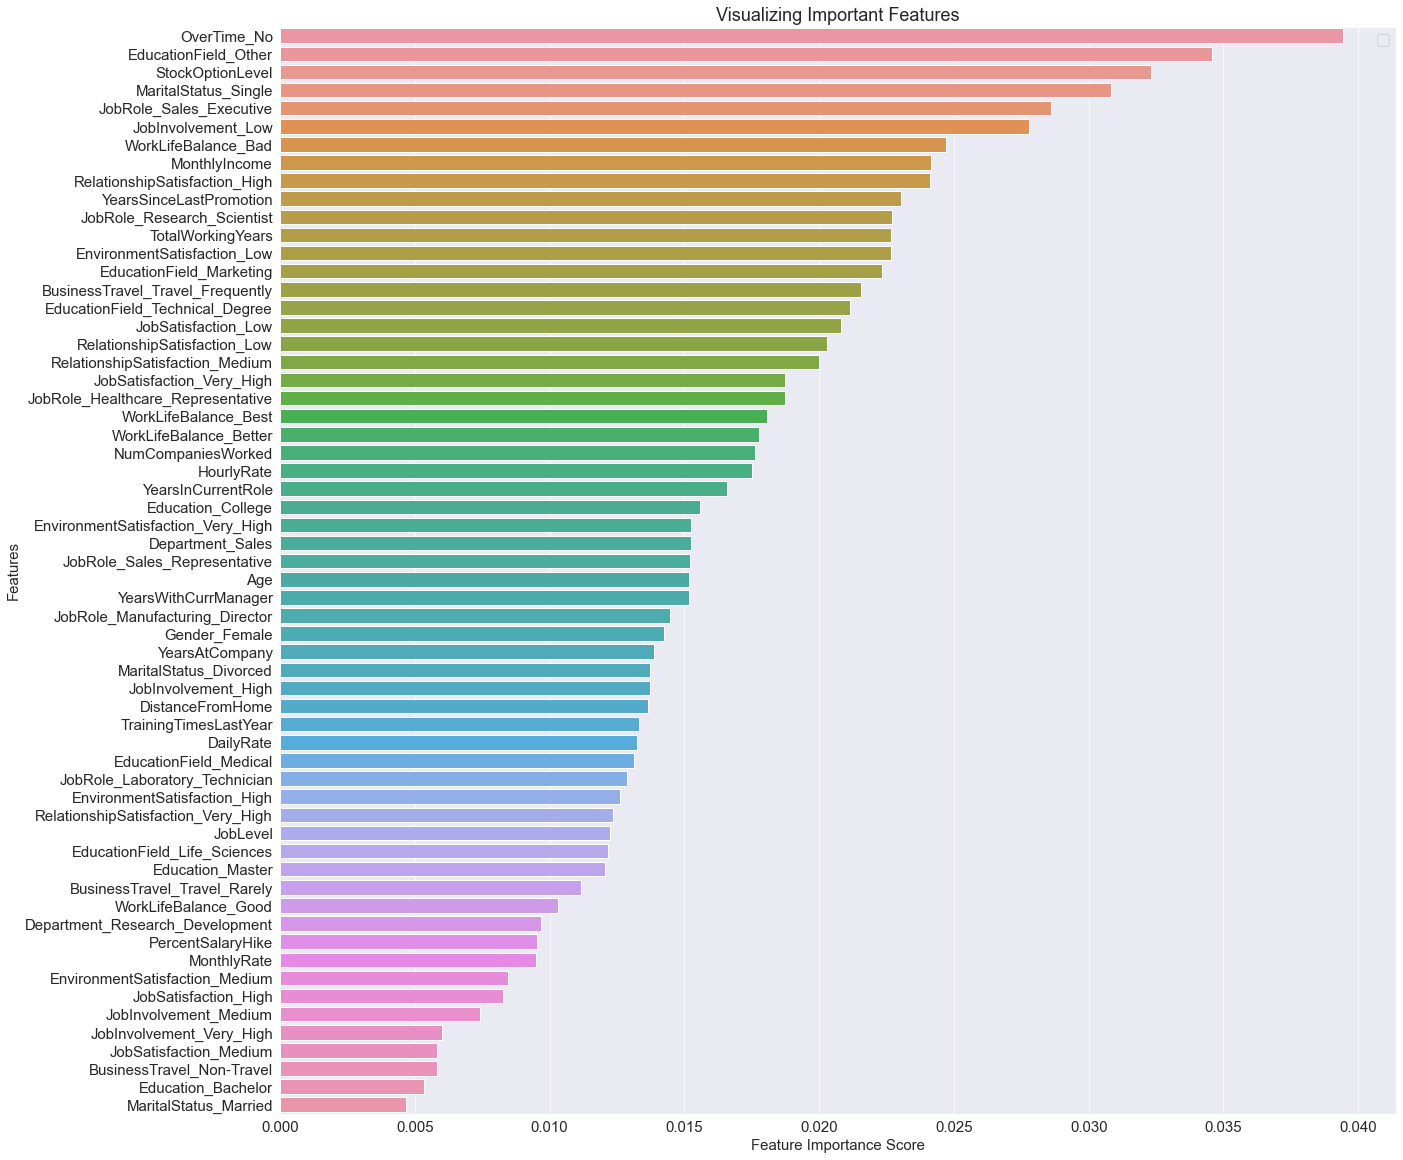

In [37]:
plt.figure(figsize=(20,20))
sns.barplot(x=feature_imp[feature_imp>0], y=feature_imp.index[feature_imp>0])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [46]:
data['EducationField'].value_counts()

Life_Sciences       606
Medical             464
Marketing           159
Technical_Degree    132
Other                82
Human_Resources      27
Name: EducationField, dtype: int64

In [47]:
print(len(data[(data['Attrition']=='Yes') & (data['EducationField']=='Other')]))
print(len(data[(data['Attrition']=='Yes') & (data['EducationField']=='Life_Sciences')]))
print(len(data[(data['Attrition']=='Yes') & (data['EducationField']=='Medical')]))
print(len(data[(data['Attrition']=='Yes') & (data['EducationField']=='Marketing')]))
print(len(data[(data['Attrition']=='Yes') & (data['EducationField']=='Technical_Degree')]))
print(len(data[(data['Attrition']=='Yes') & (data['EducationField']=='Human_Resources')]))

11
89
63
35
32
7


In [57]:
data['JobRole'].value_counts()

Sales_Executive              326
Research_Scientist           292
Laboratory_Technician        259
Manufacturing_Director       145
Healthcare_Representative    131
Manager                      102
Sales_Representative          83
Research_Director             80
Human_Resources               52
Name: JobRole, dtype: int64

### From this we can see that overtime is the variable that is given the most importance in our XGBoost model. This is intuitive as employees working overtime may want to quit due to a bad work-life balance. The other variables given importance are EducationField_Other. This is not very intuitive and probably not so useful as overtime because if the an employee is not educated in the other category he's probably working in one of the other fields which represents the majority of the dataset. The third one is Stock Option Level this is more intuitive as people with a higher stock option level may choose not to leave the firm as they may be convinced to keep working as the value of their stock grows. The fourth is Marital Status single people who are single may be less concerned with employment security and may choose to quit their jobs for better jobs or be more open to relocate for a new job. JobRole_sales executive is also unintuitive as the a majority of the employees in the data set are working in the sales executive role this is why our model considers this as an important feature. A model using these features as the main feauture may not work well at predicitng a randomly generated dataset that is different from our datset

<AxesSubplot:xlabel='Attrition', ylabel='Count'>

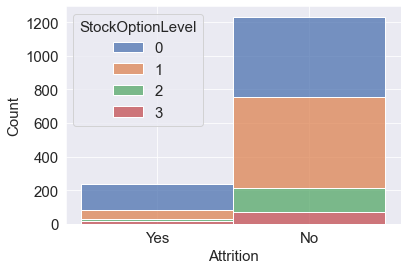

In [38]:
sns.set_style('darkgrid')
sns.histplot(x = 'Attrition', data = data, hue = 'StockOptionLevel', palette = 'deep', multiple = 'stack')

<AxesSubplot:xlabel='Attrition', ylabel='Count'>

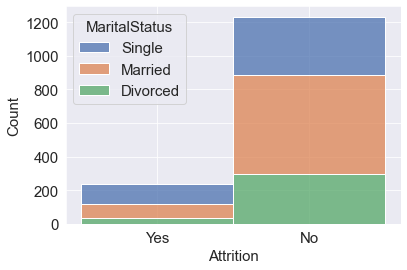

In [39]:
sns.set_style('darkgrid')
sns.histplot(x = 'Attrition', data = data, hue = 'MaritalStatus', palette = 'deep', multiple = 'stack')

<AxesSubplot:xlabel='Attrition', ylabel='Count'>

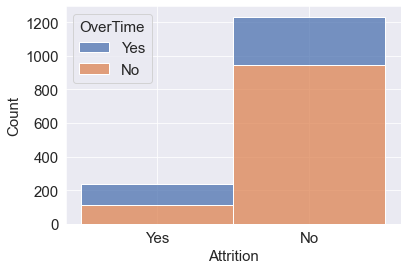

In [40]:
sns.set_style('darkgrid')
sns.histplot(x = 'Attrition', data = data, hue = 'OverTime', palette = 'deep', multiple = 'stack')

### Looking at the graph above working overtime has an effect on attrition for the people that left a majority of them were working overtime roughly twice as much as the ones who were not working overtime compared to the people that did not leave with only about 25% more than people working overtime compared to those who do not work overtime. This result is clear and intuitive as to why our model considers overtime as the most important feature. 

C:\Users\xomai\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


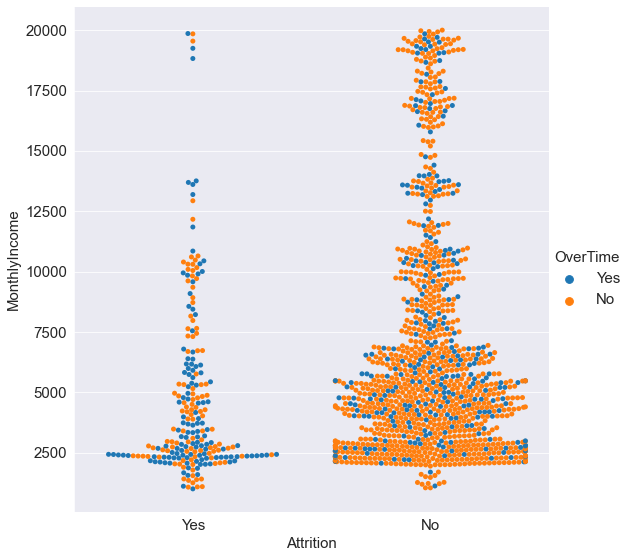

In [55]:
sns.catplot(x="Attrition", y="MonthlyIncome", hue="OverTime", kind="swarm", data=data,height = 8)

C:\Users\xomai\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


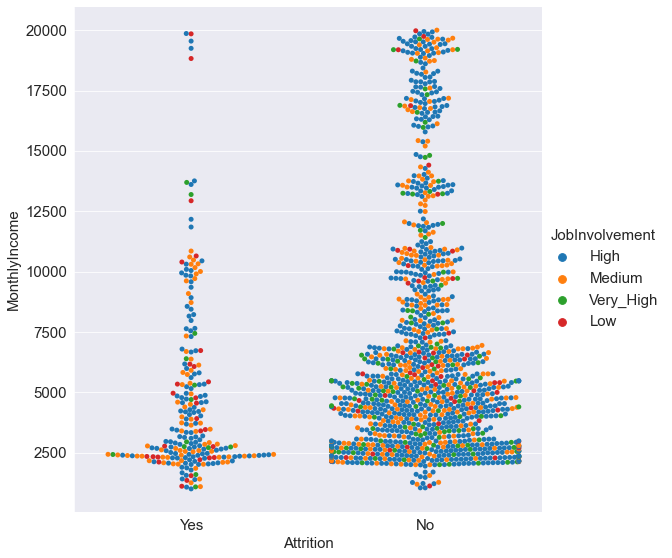

In [56]:
sns.catplot(x="Attrition", y="MonthlyIncome", hue="JobInvolvement", kind="swarm", data=data,height = 8)

<AxesSubplot:xlabel='Attrition', ylabel='Count'>

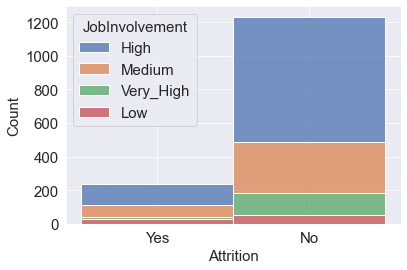

In [54]:
sns.set_style('darkgrid')
sns.histplot(x = 'Attrition', data = data, hue = 'JobInvolvement', palette = 'deep', multiple = 'stack')

### 10. Add transparacy to your modeling results 

### 11. Suggest proper solution to reduce the attrition rate.

### Working overtime is an important feature in determining if an employee leaves the company. Offering financial incentives like overtime pay may help keep employees at the job decreasing the number of hours that an employee works overtime may also help decrease employee attrition. 

### Low job involvement is also another important feature in the employee attrition. This can be solved by delegating more tasks to employees and making them a part of the decision making process to make them have a more fullfiling job. 

### Stock options may also discourage employees from leaving the company and can be used to retain employees. 
